# Exploratory Data Analysis of genomic annotation of isolate BRA006

In [1]:
import pandas as pd

Import tabular data

In [2]:
minion_data = pd.read_csv("../prokka/minion/PROKKA_11092023/PROKKA_11092023.tsv", sep = "\t")
illumina_data = pd.read_csv("../prokka/ilumina/PROKKA_11092023/PROKKA_11092023.tsv", sep = "\t")

In [3]:
minion_data.head()

,locus_tag,ftype,length_bp,gene,EC_number,COG,product
0,ONHDLDEL_00001,CDS,225,NaN,NaN,NaN,hypothetical protein
1,ONHDLDEL_00002,CDS,210,NaN,NaN,NaN,hypothetical protein
2,ONHDLDEL_00003,CDS,1188,NaN,NaN,NaN,hypothetical protein
3,ONHDLDEL_00004,CDS,192,NaN,NaN,NaN,hypothetical protein
4,ONHDLDEL_00005,CDS,102,NaN,NaN,NaN,hypothetical protein


Expore the "product" column

In [14]:
minion_data["product"].value_counts()

hypothetical protein                                               8318
putative protein                                                     39
Vitamin B12 import ATP-binding protein BtuD                          38
Narbonolide/10-deoxymethynolide synthase PikA2, modules 3 and 4      33
Narbonolide/10-deoxymethynolide synthase PikA1, modules 1 and 2      24
                                                                   ... 
2-keto-4-pentenoate hydratase                                         1
Sulfate adenylyltransferase subunit 2                                 1
Bifunctional enzyme CysN/CysC                                         1
2-aminomuconate deaminase                                             1
Transcriptional regulatory protein LnrK                               1
Name: product, Length: 1637, dtype: int64

In [15]:
illumina_data["product"].value_counts()

hypothetical protein                                 3289
putative protein                                       66
Vitamin B12 import ATP-binding protein BtuD            23
putative HTH-type transcriptional regulator            13
Phosphoglycolate phosphatase                           12
                                                     ... 
tRNA-Gln(ttg)                                           1
4-diphosphocytidyl-2-C-methyl-D-erythritol kinase       1
Ribosomal RNA small subunit methyltransferase A         1
IS5 family transposase ISFal3B                          1
Pectate trisaccharide-lyase                             1
Name: product, Length: 1937, dtype: int64

Check and compare the number of each annotated functional type 

In [11]:
pd.concat([
    minion_data.ftype.value_counts().to_frame(name = "MinION"),
    illumina_data.ftype.value_counts().to_frame(name = "Illumina")
], axis = 1)


,MinION,Illumina
CDS,11072,6080
tRNA,65,69
rRNA,6,5
tmRNA,1,1


Compare Orthologous Clusters from Illumina and MinION data

- Use the information available on [../COG/](../COG) to obtain the description of [COG](https://www.ncbi.nlm.nih.gov/research/cog-project/) categories

In [31]:
#Load tables with COG information 
cog_functions = pd.read_csv("../COG/fun-20.tab", names=["CategoryID","Color","Description"], sep = "\t")
cog_definitons = pd.read_csv("../COG/cog-20.def.tab",names = ["COG","CategoryID","Name","Gene","Pathway","PubMedID","PDBID"],sep = "\t",  encoding='cp1252')
#Get the most import cagetory and filter columns
cog_definitons["CategoryID"] = cog_definitons.CategoryID.apply(lambda x: list(x)[0])
COG = cog_definitons[["COG","CategoryID"]].merge(cog_functions, on = "CategoryID")

#Find rows with COG number
minion_cog = minion_data.loc[~minion_data.COG.isna()]
illumina_cog = illumina_data.loc[~illumina_data.COG.isna()]

Compare and plot COG Functional Description of each assembly technique

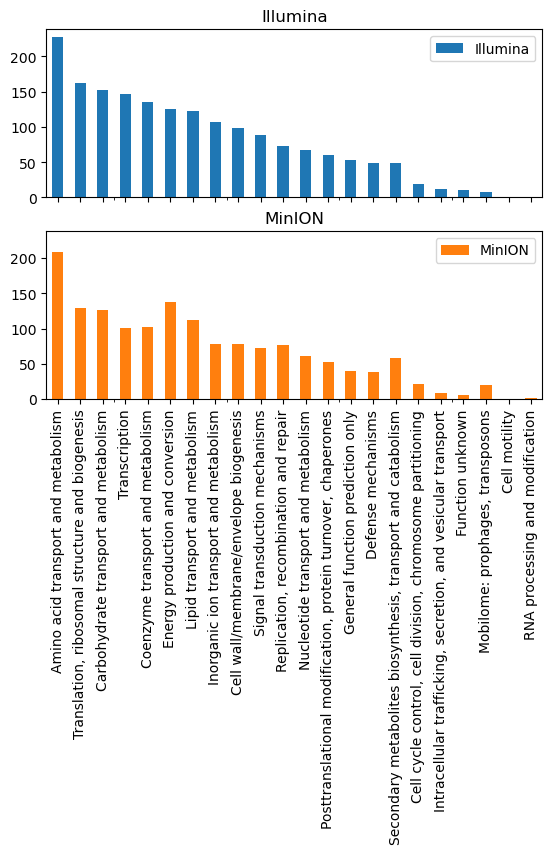

In [47]:
pd.concat([
    illumina_cog.merge(COG, on = "COG").Description.value_counts().to_frame(name = "Illumina"),
    minion_cog.merge(COG, on = "COG").Description.value_counts().to_frame(name = "MinION")
], axis = 1).plot(kind = "bar", sharey = True, subplots = True);
